##                                             California Housing Price Prediction

### Problem Statement

### The purpose of the project is to predict median house values in Californian districts, given many features from these districts. The project also aims at building a model of housing prices in California using the California census data. The data has metrics such as the population, median income, median housing price, and so on for each block group in California. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics. Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

### The Solution of this problem is carried out using python and its various features.
### The workflow of the project is:
### 1.] Importing the python packages (numpy- mathematical operations, matplotlib.pyplot for graph plotting and                 pandas for extracting the dataset)
### 2.] Extracting the Dataset of housing.csv
### 3.] Setting the independent and dependent variables from the dataset.
### 4.] Performing the imputation of the missing values using the Scikit Learn (sklearn) Library
### 5.] Performing Label and One Hot Encoding on the data
### 6.] Splitting the Data in Training Dataset and the Testing Dataset
### 7.] Performing the Scaling Operation on both the train and the test data
### 8.] Carrying out Linear Regression by fitting linear regressor on the training data
### 9.] Performing the prediction on the test data and finding out the root mean square error (rmse)
### 10.] Carrying out Decision Tree Regression on the train data using Decision Tree Regressor
### 11.] Performing the prediction on the test data and finding out the root mean square error(rmse)
### 12.] Carrying out Random Forest Regression on the train data using Random Forest Regressor
### 13.] Performing the prediction on the test data and finding out the root mean square error(rmse)
### 14.] Finally, Plotting the graph to verify the predictions of the model using linear regression



In [1]:
%config IPCompleter.greedy = True

### Importing Packages

In [2]:
#==================================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#==================================================================================

### Importing Dataset

In [3]:
#===================================================================================
housing_data = pd.read_csv("housing.csv")
#===================================================================================

In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


### To Extract independent variable (X) and dependent variable(y)

In [5]:
#===============================================================================================================================
X = housing_data[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']]
y = housing_data[['median_house_value']]
#===============================================================================================================================

In [6]:
print("********************************************************************")
print((X).head(5))
print("==========================================================")
print((y).head(5))
print("********************************************************************")

********************************************************************
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  
0         322         126         8.3252        NEAR BAY  
1        2401        1138         8.3014        NEAR BAY  
2         496         177         7.2574        NEAR BAY  
3         558         219         5.6431        NEAR BAY  
4         565         259         3.8462        NEAR BAY  
   median_house_value
0              452600
1              358500
2              352100
3              341300
4              3

### To find the number of variables to be imputed

In [7]:
print("********************************************************************")
print(housing_data.isnull().sum())
print("********************************************************************")

********************************************************************
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64
********************************************************************


### Impute missing values in total_bedrooms using an Imputer

In [8]:
#======================================================================================================
from sklearn.preprocessing import Imputer
imp_housing = Imputer(missing_values="NaN",strategy="mean",axis=0)
X[['total_bedrooms']] = imp_housing.fit_transform(X[['total_bedrooms']])
#======================================================================================================

C:\Users\Girish\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Girish\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Encoding the Data with Label Encoder and One Hot Encoder

In [9]:
#===========================================================================================================
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lbl_encoder = LabelEncoder()
X[['ocean_proximity']] = lbl_encoder.fit_transform(X[['ocean_proximity']])
onehotencoder_X = OneHotEncoder(categorical_features=[8])
X = onehotencoder_X.fit_transform(X).toarray()
#===========================================================================================================

C:\Users\Girish\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Girish\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Girish\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.

In [10]:

(pd.DataFrame(y).head(5))


,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200


### Splitting The Dataset into Train Data and Test Data 

In [11]:
#===============================================================================================================================

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

#===============================================================================================================================

In [12]:
print("********************************************************************")
print(pd.DataFrame(X_train).head(5))
print("==========================================================")
print(pd.DataFrame(X_test).head(5))
print("==========================================================")
print(pd.DataFrame(y_train).head(5))
print("==========================================================")
print(pd.DataFrame(y_test).head(5))
print("********************************************************************")

********************************************************************
    0    1    2    3    4       5      6     7       8      9       10     11  \
0  0.0  1.0  0.0  0.0  0.0 -117.55  33.83   6.0   502.0   76.0   228.0   65.0   
1  0.0  0.0  0.0  1.0  0.0 -122.44  37.73  52.0  2381.0  492.0  1485.0  447.0   
2  1.0  0.0  0.0  0.0  0.0 -118.00  33.83  26.0  1718.0  385.0  1022.0  368.0   
3  1.0  0.0  0.0  0.0  0.0 -118.26  34.01  38.0   697.0  208.0   749.0  206.0   
4  1.0  0.0  0.0  0.0  0.0 -118.36  34.08  52.0  2373.0  601.0  1135.0  576.0   

       12  
0  4.2386  
1  4.3898  
2  3.9333  
3  1.4653  
4  3.1765  
    0    1    2    3    4       5      6     7       8      9       10     11  \
0  0.0  0.0  0.0  0.0  1.0 -117.05  32.58  22.0  2101.0  399.0  1551.0  371.0   
1  1.0  0.0  0.0  0.0  0.0 -117.97  33.92  32.0  2620.0  398.0  1296.0  429.0   
2  0.0  1.0  0.0  0.0  0.0 -121.84  38.65  29.0  3167.0  548.0  1554.0  534.0   
3  0.0  1.0  0.0  0.0  0.0 -115.60  33.20  37.0 

###  Standardizing the train and test data using the Standard Scaler 

In [13]:
#==============================================================================================================
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train[:,[7,12]] = sc_X.fit_transform(X_train[:,[7,12]])
X_test[:,[7,12]] = sc_X.transform(X_test[:,[7,12]])
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)
#==============================================================================================================

## Performing Linear Regression

### Importing Library

In [14]:
#================================================================================================================
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
#================================================================================================================

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Prediction Of the Test Data Over The Fitted Data

In [15]:
#======================================================================================================
y_pred=lin_reg.predict(X_test)

#======================================================================================================

### Carrying out error predictions

In [16]:
#===============================================================================================================================
housing_values_train= pd.DataFrame()
housing_values_train['Actual_Values'] = housing_values_train.append(pd.DataFrame(y_train,columns=['median_house_value']),ignore_index=True)
housing_values_train['Linear Predictions'] = lin_reg.predict(X_train)
print((housing_values_train).head(5))
print("**************************************************************************")
housing_values_test= pd.DataFrame()
housing_values_test['Actual_Values'] = housing_values_test.append(pd.DataFrame(y_test,columns=['median_house_value']),ignore_index=True)
housing_values_test['Linear Predictions'] = lin_reg.predict(X_test)
print((housing_values_test).head(5))
#==============================================================================================================================

   Actual_Values  Linear Predictions
0       2.530522           -0.473487
1       0.542408            0.586343
2      -0.096379            0.122255
3      -0.764555           -0.656114
4       0.153431            0.342715
**************************************************************************
   Actual_Values  Linear Predictions
0      -0.608100            0.080653
1       0.294327            0.693263
2      -0.056617           -0.240235
3      -1.164770           -1.043881
4       2.184756            0.730474


### Creating Function to find RMSE

In [17]:
#=================================================================================================================
def rmse(actual,predictions):
    return(round(np.sqrt(np.mean((actual-predictions)**2)),2))
#=================================================================================================================

### The Result Of RMSE

In [18]:
#==================================================================================================================================
print("For the Linear Model")
print("The Root Mean Square Error of the train is :",rmse(housing_values_train['Actual_Values'],housing_values_train['Linear Predictions']))
print("************************************************************************************")
print("************************************************************************************")
print("For the Linear Model")
print("The Root Mean Square Error of the test is :",rmse(housing_values_test['Actual_Values'],housing_values_test['Linear Predictions']))
#==================================================================================================================================

For the Linear Model
The Root Mean Square Error of the train is : 0.59
************************************************************************************
************************************************************************************
For the Linear Model
The Root Mean Square Error of the test is : 0.59


## Performing Decision Tree Regression

### Importing Library

In [19]:
#===========================================================================================================================
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train,y_train)
#===========================================================================================================================

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Prediction Of the Test Data Over The Fitted Data

In [20]:
#===========================================================================================================================

dt_pred = dt_regressor.predict(X_test)

#===========================================================================================================================

### Carrying out error predictions

In [21]:
#=============================================================================================================================
housing_values_train= pd.DataFrame()
housing_values_train['Actual_Values'] = housing_values_train.append(pd.DataFrame(y_train,columns=['median_house_value']),ignore_index=True)
housing_values_train['Linear Predictions'] = lin_reg.predict(X_train)
housing_values_train['Decision Tree Predictions'] = dt_regressor.predict(X_train)
print((housing_values_train).head(5))
print("**************************************************************************")
housing_values_test= pd.DataFrame()
housing_values_test['Actual_Values'] = housing_values_test.append(pd.DataFrame(y_test,columns=['median_house_value']),ignore_index=True)
housing_values_test['Linear Predictions'] = lin_reg.predict(X_test)
housing_values_test['Decision Tree Predictions'] = dt_regressor.predict(X_test)
print((housing_values_test).head(5))
#==============================================================================================================================

   Actual_Values  Linear Predictions  Decision Tree Predictions
0       2.530522           -0.473487                   2.530522
1       0.542408            0.586343                   0.542408
2      -0.096379            0.122255                  -0.096379
3      -0.764555           -0.656114                  -0.764555
4       0.153431            0.342715                   0.153431
**************************************************************************
   Actual_Values  Linear Predictions  Decision Tree Predictions
0      -0.608100            0.080653                  -0.583033
1       0.294327            0.693263                   1.937540
2      -0.056617           -0.240235                  -0.405832
3      -1.164770           -1.043881                  -1.013501
4       2.184756            0.730474                   2.530521


### Creating Function to find RMSE

In [22]:
#=================================================================================================================
def rmse(actual,predictions):
    return(round(np.sqrt(np.mean((actual-predictions)**2)),2))
#=================================================================================================================

### The Result Of RMSE

In [23]:
#==================================================================================================================================
print("For the Decision Tree Model")
print("The Root Mean Square Error of the train is :",rmse(housing_values_train['Actual_Values'],housing_values_train['Decision Tree Predictions']))
print("************************************************************************************")
print("************************************************************************************")
print("For the Decision Tree Model")
print("The Root Mean Square Error of the test is :",rmse(housing_values_test['Actual_Values'],housing_values_test['Decision Tree Predictions']))
#===================================================================================================================================

For the Decision Tree Model
The Root Mean Square Error of the train is : 0.0
************************************************************************************
************************************************************************************
For the Decision Tree Model
The Root Mean Square Error of the test is : 0.59


## Performing Random Forrest Regression

### Importing Library

In [24]:
#==============================================================================================================================
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10 , random_state = 0)
rf_regressor.fit(X_train,y_train)
#===============================================================================================================================

C:\Users\Girish\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

### Prediction Of the Test Data Over The Fitted Data

In [25]:
#==============================================================================================================================

rfr_pred = rf_regressor.predict(X_test)
print(pd.DataFrame(rfr_pred).head(5))

#==============================================================================================================================

          0
0 -0.514227
1  0.145738
2 -0.537998
3 -1.181107
4  1.236259


### Carrying out error predictions

In [26]:
#==================================================================================================================================
housing_values_train= pd.DataFrame()
housing_values_train['Actual_Values'] = housing_values_train.append(pd.DataFrame(y_train,columns=['median_house_value']),ignore_index=True)
housing_values_train['Linear Predictions'] = lin_reg.predict(X_train)
housing_values_train['Decision Tree Predictions'] = dt_regressor.predict(X_train)
housing_values_train['Random Forest Predictions'] = rf_regressor.predict(X_train)
print((housing_values_train).head(5))
print("**************************************************************************")
housing_values_test= pd.DataFrame()
housing_values_test['Actual_Values'] = housing_values_test.append(pd.DataFrame(y_test,columns=['median_house_value']),ignore_index=True)
housing_values_test['Linear Predictions'] = lin_reg.predict(X_test)
housing_values_test['Decision Tree Predictions'] = dt_regressor.predict(X_test)
housing_values_test['Random Forest Predictions'] = rf_regressor.predict(X_test)
print((housing_values_test).head(5))
#==================================================================================================================================

   Actual_Values  Linear Predictions  Decision Tree Predictions  \
0       2.530522           -0.473487                   2.530522   
1       0.542408            0.586343                   0.542408   
2      -0.096379            0.122255                  -0.096379   
3      -0.764555           -0.656114                  -0.764555   
4       0.153431            0.342715                   0.153431   

   Random Forest Predictions  
0                   1.225283  
1                   0.602743  
2                  -0.110728  
3                  -0.750207  
4                   0.477578  
**************************************************************************
   Actual_Values  Linear Predictions  Decision Tree Predictions  \
0      -0.608100            0.080653                  -0.583033   
1       0.294327            0.693263                   1.937540   
2      -0.056617           -0.240235                  -0.405832   
3      -1.164770           -1.043881                  -1.013501   
4

### Creating Function to find RMSE

In [27]:
#=================================================================================================================
def rmse(actual,predictions):
    return(round(np.sqrt(np.mean((actual-predictions)**2)),2))
#=================================================================================================================

### The Result Of RMSE

In [28]:
#==================================================================================================================================
print("For the Random Forest Model")
print("The Root Mean Square Error of the train is :",rmse(housing_values_train['Actual_Values'],housing_values_train['Random Forest Predictions']))
print("************************************************************************************")
print("************************************************************************************")
print("For the Random Forest Model")
print("The Root Mean Square Error of the test is :",rmse(housing_values_test['Actual_Values'],housing_values_test['Random Forest Predictions']))
#===================================================================================================================================

For the Random Forest Model
The Root Mean Square Error of the train is : 0.19
************************************************************************************
************************************************************************************
For the Random Forest Model
The Root Mean Square Error of the test is : 0.44


## Extracting median_income from independent variable

In [29]:
#=====================================================================================================================
median_income_train = pd.DataFrame(X_train[:,12:13])
print((median_income_train).head(5))
print("**********************************************")
median_income_test = pd.DataFrame(X_test[:,12:13])
print((median_income_test).head(5))
#======================================================================================================================

          0
0  0.190012
1  0.269311
2  0.029895
3 -1.264470
4 -0.367016
**********************************************
          0
0  0.144489
1  0.998204
2  0.247755
3 -0.747459
4  0.591906


### Applying Linear Regression on the "median_income" for the trained data

In [30]:
#========================================================================================================================
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(X_train[:,12:13],y_train)
#========================================================================================================================

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predicting the output on the test data 

In [31]:
#========================================================================================================================

housingvalues_pred = lin_regressor.predict(X_test[:,12:13])

#========================================================================================================================

In [32]:
#========================================================================================================================

print(pd.DataFrame(housingvalues_pred).head(5))

#========================================================================================================================

          0
0  0.100096
1  0.691514
2  0.171635
3 -0.517808
4  0.410048


### Plot for predicting housing values using the train data

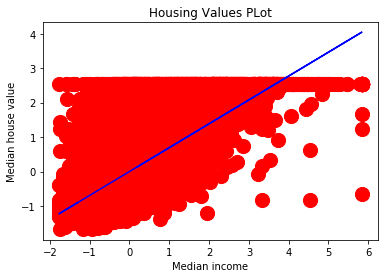

In [33]:
#========================================================================================================================

plt.scatter(X_train[:,12:13],y_train,s=200,c="red")
plt.plot(X_train[:,12:13],lin_regressor.predict(X_train[:,12:13]),c="blue")
plt.title("Housing Values PLot")
plt.xlabel("Median income")
plt.ylabel("Median house value")
plt.show()

#=========================================================================================================================

### Plot for predicting housing values using test data

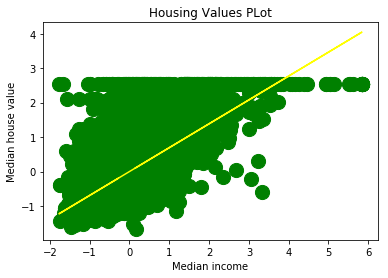

In [34]:
#======================================================================================================================

plt.scatter(X_test[:,12:13],y_test,s=200,c="green")
plt.plot(X_test[:,12:13],lin_regressor.predict(X_test[:,12:13]),c="yellow")
plt.title("Housing Values PLot")
plt.xlabel("Median income")
plt.ylabel("Median house value")
plt.show()

#=======================================================================================================================

## Printing the Predicted Housing Values in the .csv Format

In [35]:
#=============================================================================================================================
housing_values = pd.DataFrame()
housing_values['Actual Values']= housing_values.append(pd.DataFrame(y_test,columns=['median_house_value']),ignore_index=True)
housing_values['Linear Predictions'] = pd.DataFrame(y_pred)
housing_values['Decision Tree Predictions'] = pd.DataFrame(dt_pred)
housing_values['Random Forest Predictions'] = pd.DataFrame(rfr_pred)
#=============================================================================================================================

## Converting the DataFrame to .csv Format

In [36]:
#=========================================================================================================================

housing_values.to_csv('housing_values.csv',encoding='utf-8', index=False)

#=========================================================================================================================

## The Final Dataset with predicted housing values

In [37]:
#==========================================================================================================================

housing_values

#===========================================================================================================================

,Actual Values,Linear Predictions,Decision Tree Predictions,Random Forest Predictions
0,-0.608100,0.080653,-0.583033,-0.514227
1,0.294327,0.693263,1.937540,0.145738
2,-0.056617,-0.240235,-0.405832,-0.537998
3,-1.164770,-1.043881,-1.013501,-1.181107
4,2.184756,0.730474,2.530521,1.236259
5,-0.754183,-0.038912,-0.576118,-0.835954
6,0.343597,0.645055,0.252836,0.631441
7,1.120688,0.933200,1.559800,1.772010
8,1.144891,0.864888,0.396325,1.054216
9,0.504375,0.299548,0.357428,0.361923
